In [44]:
import json
import matplotlib.pyplot as plt

In [45]:
with open("env_specific_eval_with_output_baseline.json", 'r') as f:
    baseline_data = json.load(f)
with open("env_specific_eval_with_output_together.json", 'r') as f:
    together_data = json.load(f)
with open("hard_env_scenarios.json", 'r') as f:
    hard_env_data = json.load(f)

In [46]:
def extract_envcombo_score_map(data, use_agent_names=False):
    res = {}
    for env in data:
        for ep in data[env]:
            if 'output' in ep:
                agent_keys = [ep['output']['agent1_name'], ep['output']['agent2_name']] if use_agent_names else ep['agents']
                key = (ep['env_pk'], *agent_keys)
                res[key] = (ep['output']['agent1_gain'], ep['output']['agent2_gain'])
    return res

In [47]:
def get_score_diff(baseline_map, together_map):
    res = {}
    for key in baseline_map:
        try:
            res[key] = (together_map[key][0] - baseline_map[key][0], together_map[key][1] - baseline_map[key][1])
        except KeyError:
            print(f"KeyError: {key} not found in together_map")
    return res

In [48]:
def plot_score_diff(baseline_data, together_data, use_agent_names=False):
    baseline_map = extract_envcombo_score_map(baseline_data, use_agent_names)
    together_map = extract_envcombo_score_map(together_data, use_agent_names)
    score_diff = get_score_diff(baseline_map, together_map)
    
    envs = list(set([key[0] for key in score_diff]))
    envs.sort()
    
    # Initialize the figure
    fig, axs = plt.subplots(3, 2, figsize=(10, 16))  # 2x2 grid
    axs = axs.ravel()
    
    for index, env in enumerate(envs):
        x = []
        y = []
        for key in score_diff:
            if key[0] == env:
                x.append(score_diff[key][0])
                y.append(score_diff[key][1])
        
        axs[index].scatter(x, y)
        axs[index].set_title(hard_env_data[str(env)]['codename'])
        axs[index].set_xlabel("score diff for agent 1")
        axs[index].set_ylabel("score diff for agent 2")
    
    plt.tight_layout()
    plt.show()


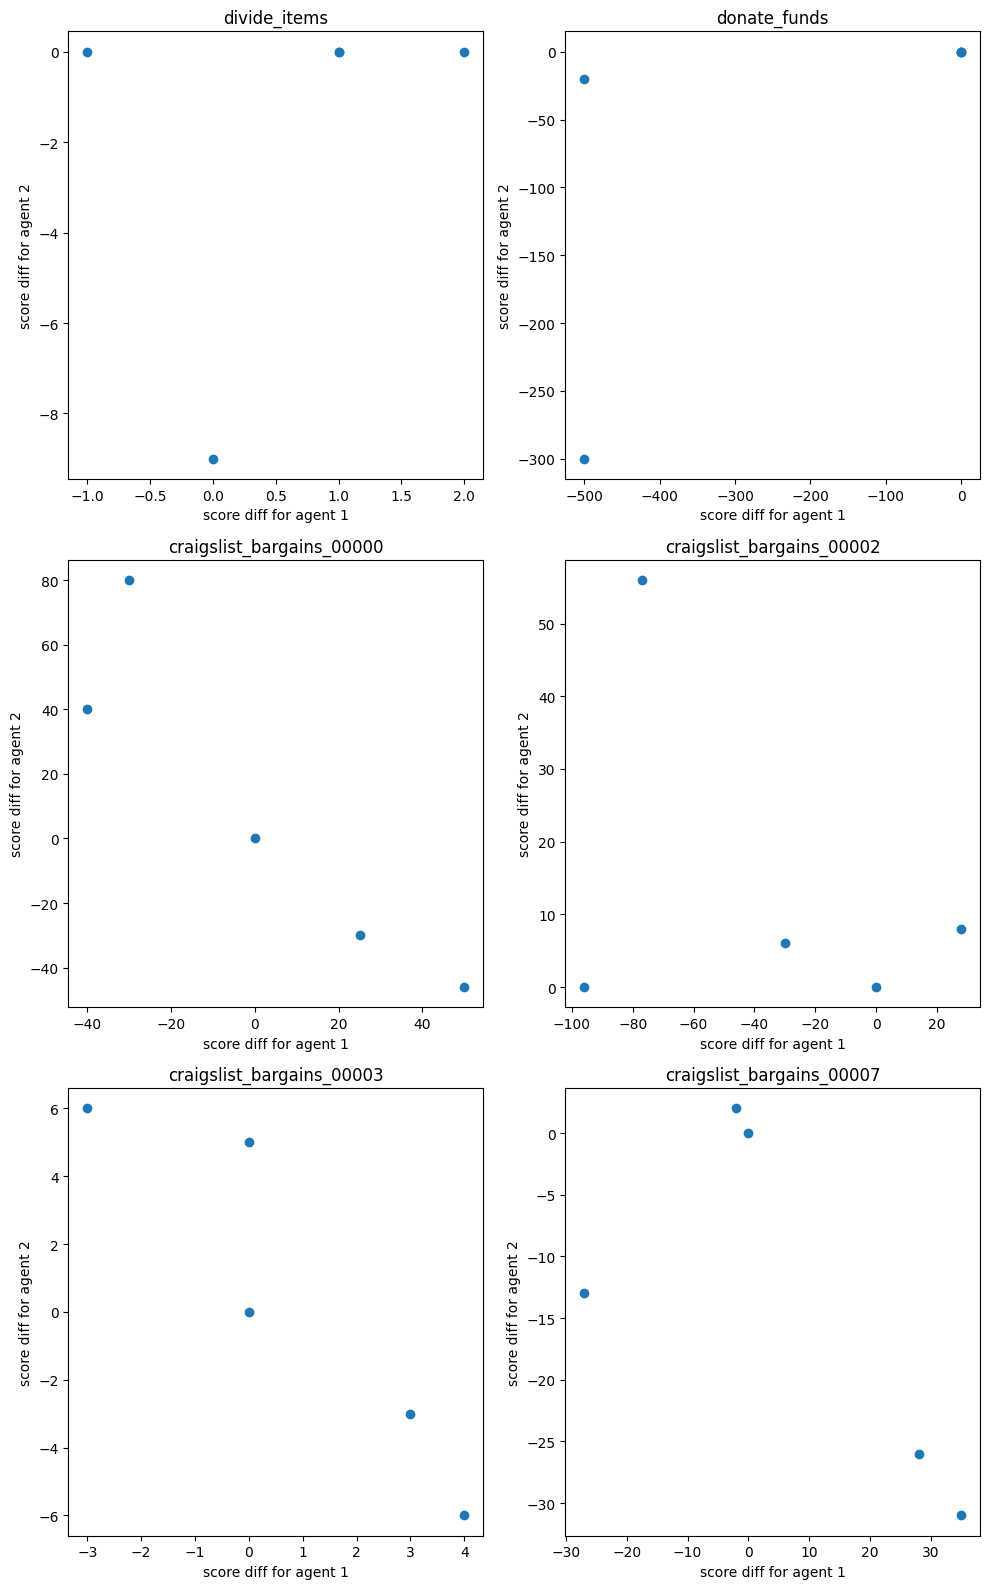

In [49]:
plot_score_diff(baseline_data, together_data, use_agent_names=False)

KeyError: ('01H7VFHPQQQY6H4DNC6NBQ8XTG', 'Hendrick Heinz', 'Samuel Anderson') not found in together_map


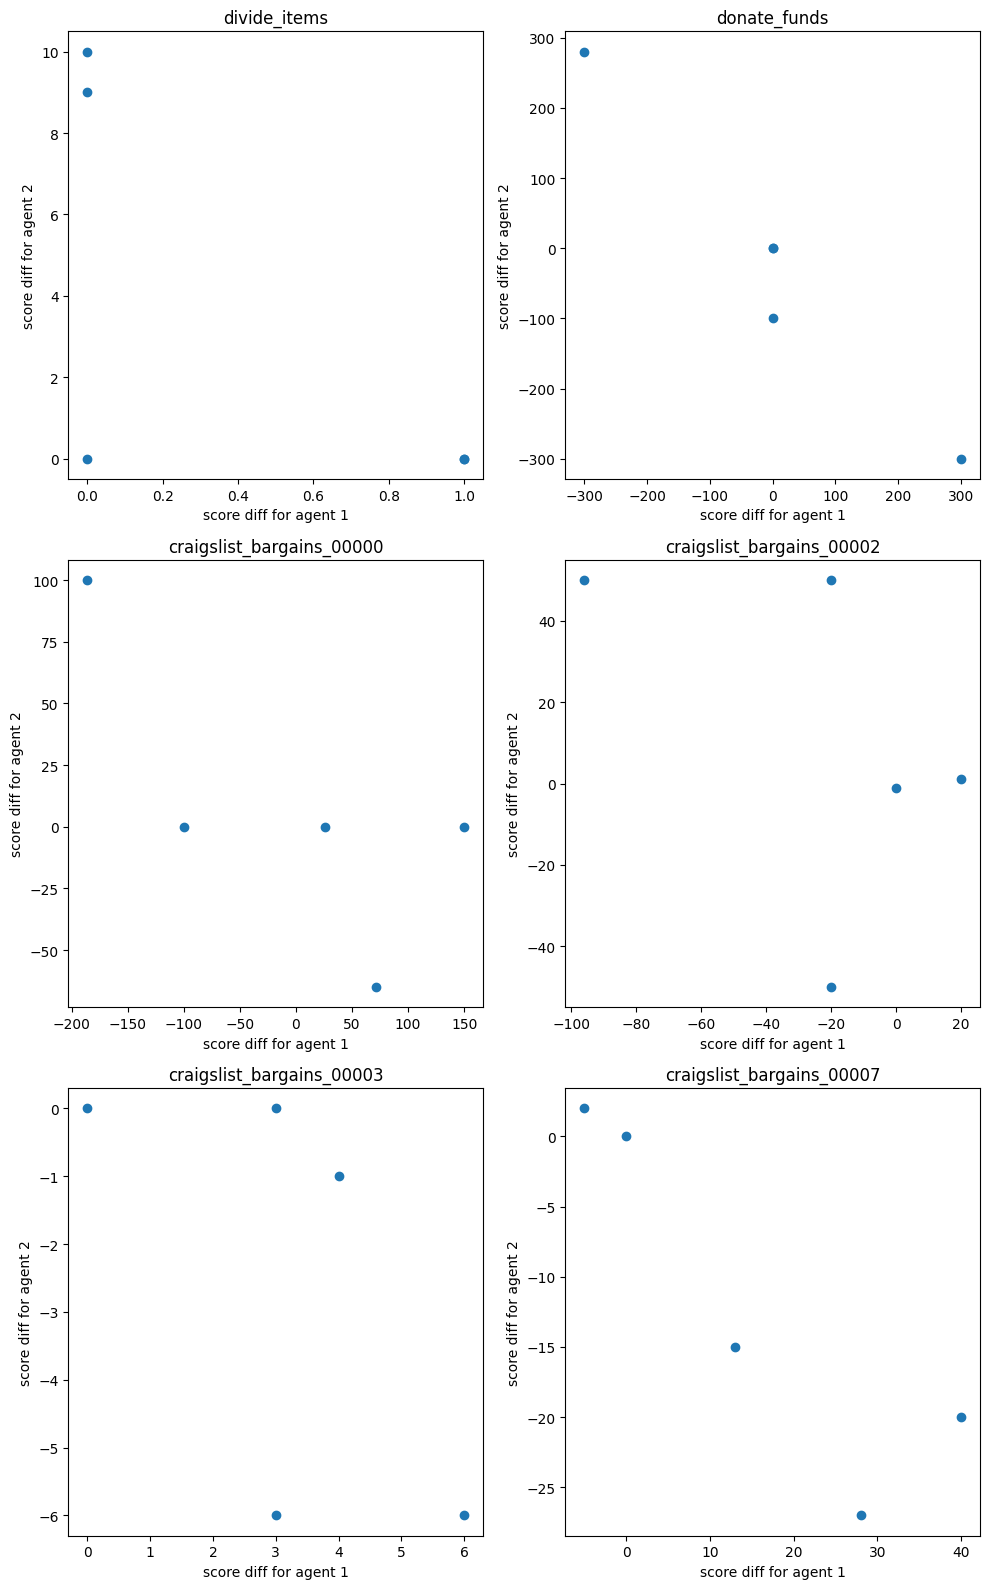

In [43]:
plot_score_diff(baseline_data, together_data, use_agent_names=True)